In [14]:
#from fairworkflows import is_fairworkflow, is_fairstep

In [1]:
from fairworkflows import is_fairworkflow, is_fairstep, FairStep, FairWorkflow

In [2]:
import fairworkflows

In [3]:
help (fairworkflows._version)

Help on module fairworkflows._version in fairworkflows:

NAME
    fairworkflows._version

VERSION
    0.2.5

FILE
    /Users/remzicelebi/opt/anaconda3/lib/python3.8/site-packages/fairworkflows/_version.py




In [4]:
import io

In [5]:
from PIL import Image
from PIL import ImageDraw 
from PIL import ImageEnhance

In [6]:
@is_fairstep(label='Resize image')
def resize_image(image:Image) -> Image:    
    """Resize the image 300x300 """
    new_image = image.resize((300, 300))
    return new_image

In [7]:
@is_fairstep(label='Rotate image')
def rotate_image(image:Image) -> Image:    
    """Rotate image"""
    new_image = image.transpose(Image.ROTATE_90)
    return new_image

In [8]:
@is_fairstep(label='Convert image to grayscale')
def rgb2gray_image(image:Image) -> Image:    
    """Convert image to grayscale"""
    new_image = image.convert('LA')
    return new_image

In [9]:
@is_fairstep(label='Add text to image')
def add_text_to_image(image:Image, text:str) -> Image:    
    """Add text to a image"""
    new_image= image.copy()
    draw = ImageDraw.Draw(new_image)
    draw.text((0, 0),text)
    return new_image

In [10]:
@is_fairstep(label='contrast image by ratio')
def contrast_image(image:Image, ratio:float) -> Image:    
    """Add text to a image"""
    from PIL import ImageEnhance
    new_image= image.copy()
    new_image = ImageEnhance.Contrast(im)
    new_image= new_image.enhance(ratio)
    return new_image

In [11]:
@is_fairworkflow(label='My Workflow for converting to Grayscale and adding text')
def my_workflow(im1, text):
    """
    A simple addition, subtraction, multiplication workflow
    """
    im2 = rgb2gray_image(im1)
    im3 = add_text_to_image(im2, text)
    return im3

In [12]:
image = Image.open('img1.png')

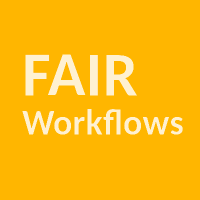

In [19]:
image

In [14]:
#fw = my_workflow(imgStr)
#type(fw)
fw = FairWorkflow.from_function(my_workflow)
type(fw)

fairworkflows.fairworkflow.FairWorkflow

In [15]:
result, prov = fw.execute(image,'FAIR Workflows')
#result

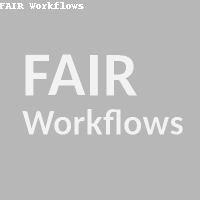

In [18]:
result

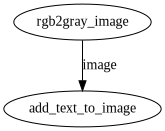

In [17]:
fw.display()

In [86]:
print (prov)

Workflow retrospective provenance.
@prefix pplan: <http://purl.org/net/p-plan#> .
@prefix prov: <http://www.w3.org/ns/prov#> .

[] a pplan:Bundle,
        prov:Collection ;
    prov:hasMember <http://www.example.org/unpublished-entity-8792498501172>,
        <http://www.example.org/unpublished-entity-8792498501298> ;
    prov:wasDerivedFrom <http://www.example.org/unpublishedworkflow> .




In [87]:
fw.publish_as_nanopub(publish_steps=True, use_test_server=True)

Published to http://purl.org/np/RAHMZLtLpoe41lxJ0vak1rE0rK2lv11U4FegkBAK4JMHU
Published concept to http://purl.org/np/RAHMZLtLpoe41lxJ0vak1rE0rK2lv11U4FegkBAK4JMHU#step
Published to http://purl.org/np/RAkMo_sH92rqAiVmujDEjmEsj9rEeXyha3Wb5RsLYxwTc
Published concept to http://purl.org/np/RAkMo_sH92rqAiVmujDEjmEsj9rEeXyha3Wb5RsLYxwTc#step
Published to http://purl.org/np/RAxTgAeu-Kf2J_aSShH-dXuTZduPVIdnN9Q3mfK56bJXs
Published concept to http://purl.org/np/RAxTgAeu-Kf2J_aSShH-dXuTZduPVIdnN9Q3mfK56bJXs#plan


{'nanopub_uri': 'http://purl.org/np/RAxTgAeu-Kf2J_aSShH-dXuTZduPVIdnN9Q3mfK56bJXs',
 'concept_uri': 'http://purl.org/np/RAxTgAeu-Kf2J_aSShH-dXuTZduPVIdnN9Q3mfK56bJXs#plan'}

In [88]:
prov.publish_as_nanopub(use_test_server=True)

Published to http://purl.org/np/RAqSro-iuLyvtxSTC5ErHvx0d6tqhiu1esDOoWy8cD8og
Published concept to http://purl.org/np/RAqSro-iuLyvtxSTC5ErHvx0d6tqhiu1esDOoWy8cD8og#fairstepprov
Published to http://purl.org/np/RAdpjgc_ZCKH4PWHohElL8GWr8gWsNy9GlniAz7RxPYBY
Published concept to http://purl.org/np/RAdpjgc_ZCKH4PWHohElL8GWr8gWsNy9GlniAz7RxPYBY#fairstepprov
Published to http://purl.org/np/RAyq4hVRQ7pak6HhxBzmTYrjysZShwsIYrHJMOekC3ihM
Published concept to http://purl.org/np/RAyq4hVRQ7pak6HhxBzmTYrjysZShwsIYrHJMOekC3ihM#fairworkflowprov


{'nanopub_uri': 'http://purl.org/np/RAyq4hVRQ7pak6HhxBzmTYrjysZShwsIYrHJMOekC3ihM',
 'concept_uri': 'http://purl.org/np/RAyq4hVRQ7pak6HhxBzmTYrjysZShwsIYrHJMOekC3ihM#fairworkflowprov'}

In [90]:
print(fw)

Workflow URI = http://purl.org/np/RAxTgAeu-Kf2J_aSShH-dXuTZduPVIdnN9Q3mfK56bJXs#plan
@prefix dc: <http://purl.org/dc/terms/> .
@prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix pplan: <http://purl.org/net/p-plan#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <https://schema.org/> .

_:N43a0f7897a0041aaa5f00f9a5999b68d {
    <http://purl.org/np/RAHMZLtLpoe41lxJ0vak1rE0rK2lv11U4FegkBAK4JMHU#out1> pplan:bindsTo <http://purl.org/np/RAkMo_sH92rqAiVmujDEjmEsj9rEeXyha3Wb5RsLYxwTc#image> .

    <http://purl.org/np/RAHMZLtLpoe41lxJ0vak1rE0rK2lv11U4FegkBAK4JMHU#step> pplan:isStepOfPlan _:plan ;
        dul:precedes <http://purl.org/np/RAkMo_sH92rqAiVmujDEjmEsj9rEeXyha3Wb5RsLYxwTc#step> .

    <http://purl.org/np/RAkMo_sH92rqAiVmujDEjmEsj9rEeXyha3Wb5RsLYxwTc#out1> pplan:bindsTo [ ] .

    <http://purl.org/np/RAkMo_sH92rqAiVmujDEjmEsj9rEeXyha3Wb5RsLYxwTc#step> pplan:isStepOfPlan _:plan .

   